In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv('iris.csv')
df.head(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df.shape

(150, 6)

<AxesSubplot:>

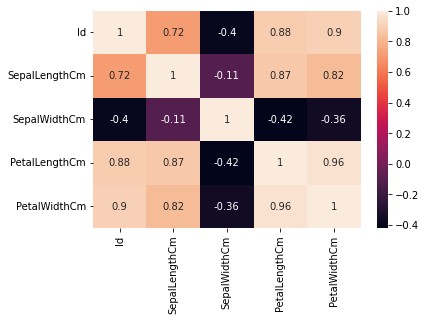

In [24]:
correl=df.corr()
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

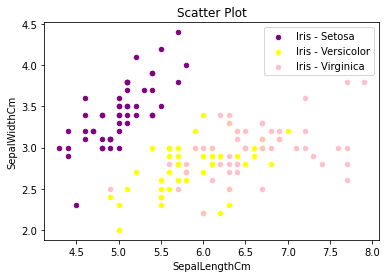

In [25]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='purple', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='yellow', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='pink', label='Iris - Virginica', ax=ax)


ax.set_title("Scatter Plot")


In [26]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [27]:
df1= df.drop(['Id'], axis = 1)

In [28]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
np.unique(df['Species'])

array([0, 1, 2])

In [30]:
df.shape

(150, 6)

In [31]:
data = df1.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training
train_labels= kmeans.predict(train_x)

#test
test_labels = kmeans.predict(test_x)

In [35]:

km = KMeans(n_clusters=5, init='random', 
            max_iter=200, random_state=0)
y_km = km.fit_predict(df)



In [37]:
#accuracy
print(accuracy_score(train_y, train_labels))
print(accuracy_score(test_labels, test_y))

0.9910714285714286
0.9473684210526315
